In [2]:
%matplotlib inline  

import comparison_tests
import single_bandit
import epsilongreedy_bandit
import choose_winner_bandit
import bayesian_bandit
import equal_bandit

import matplotlib.pyplot as plt
import numpy as np

#
# Run and compare different strategies to the 2-arm bandit problem over many trials.
# 
# Goal is to find the optimal solution, ie. the one which favors the optimal bandit (aks treatment) the fastest.
# See : https://en.wikipedia.org/wiki/Multi-armed_bandit
#
# This code runs and plots the results of 4 different approaches, along with approaches which simply play 
# each bandit all the time.  Each approach is detailed in it's *Bandit.py script
#
# Possible improvements that I didn't get around to :
# - generify code to take as many bandits as you want
# - UCB1 approach (https://jeremykun.com/2013/10/28/optimism-in-the-face-of-uncertainty-the-ucb1-algorithm/)
# - Make epsilon-greedy dynamic (epsilon decreases as time goes on)
# 
# args:
#   numTrials - # of iterations (pulls of the handle)
#   probs - probability of winning for each treatment  
#
def compare_all_bandits(numTrials = 1000, probs = [.05, .1]):
    # B is the winner
    TREATMENTS = ['A', 'B']
    
    # apply treatment A every time
    single_bandit_a_results = comparison_tests.multitrial_bandit(single_bandit.SingleBandit(TREATMENTS, 'A'), 
                                                                 numTrials=numTrials, probs=probs)
    # apply treatment B every time, this would be the optimal solution if we knew....
    single_bandit_b_results = comparison_tests.multitrial_bandit(single_bandit.SingleBandit(TREATMENTS, 'B'), 
                                                                 numTrials=numTrials, probs=probs)

    # Apply differnt strategies
    equal_bandit_results = comparison_tests.multitrial_bandit(equal_bandit.EqualBandit(TREATMENTS), 
                                                              numTrials=numTrials, probs=probs)
    choosethewinner_bandit_results = comparison_tests.multitrial_resultbased_bandit(choose_winner_bandit.ChooseTheWinnerBandit(TREATMENTS), 
                                                                                    numTrials=numTrials, probs=probs)
    bayesian_bandit_results = comparison_tests.multitrial_resultbased_bandit(bayesian_bandit.BayesianBandit(TREATMENTS), 
                                                                             numTrials=numTrials, probs=probs)
    epsilon_greedy_bandit_results = comparison_tests.multitrial_resultbased_bandit(epsilongreedy_bandit.EpsilonGreedyBandit(TREATMENTS), 
                                                                             numTrials=numTrials, probs=probs)
    
    plot_result(probs, single_bandit_a_results, single_bandit_b_results,
                equal_bandit_results, choosethewinner_bandit_results,
                bayesian_bandit_results, epsilon_greedy_bandit_results)

#
#  plot the number of wins for each strategy (y axis) by the number of trials (x axis)
#
def plot_result(probs, single_bandit_a_results, single_bandit_b_results, 
                equal_bandit_results, choosethewinner_bandit_results, 
                bayesian_bandit_results, epsilon_greedy_bandit_results):
    
    plt.title('Success counts by algo [probs = %s, n = %d]' % (str(probs), len(single_bandit_a_results)))
    plt.xlabel('Visit #')
    plt.ylabel('Success count')
    
    ylim = max(sum(single_bandit_a_results)+1, sum(single_bandit_b_results)+1)
    plt.ylim(0, ylim)
    
    plt.plot(np.array(single_bandit_a_results).cumsum(), label='Treatment A')
    plt.plot(np.array(single_bandit_b_results).cumsum(), label='Treatment B')
    plt.plot(np.array(equal_bandit_results).cumsum(), label='Uniform(A/B)')
    plt.plot(np.array(choosethewinner_bandit_results).cumsum(), label='Choose_Winner')    
    plt.plot(np.array(bayesian_bandit_results).cumsum(), label='Bayesian')
    plt.plot(np.array(epsilon_greedy_bandit_results).cumsum(), label='E-Greedy')
    plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
    
    # make the plot bigger
    fig = plt.gcf()
    fig.set_size_inches(15, 10)

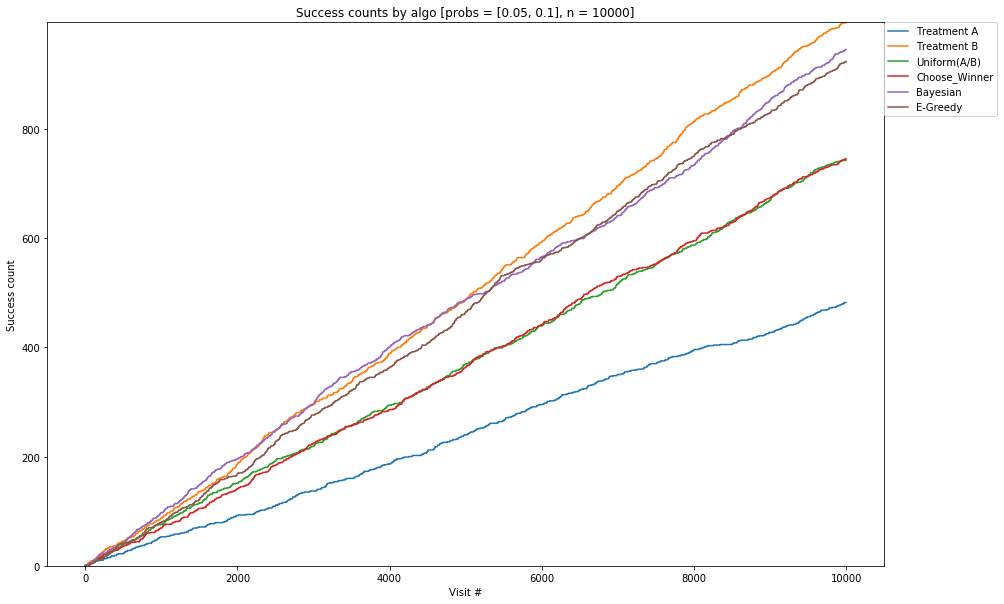

In [3]:
#
# Results will vary but in general bayesian surpasses others (except the optimal treatment itself) eventually
# E-Greedy is second
#

compare_all_bandits(10000)